Ho per ogni frequenza di pump un set di frequenze del vna
- Devo misurare il gain per ogni frequenza

In [116]:
import hdf5
import h5py
import numpy as np

file_name = 'twpa.hdf5'

with h5py.File(file_name, 'r') as f:
		data_pump = {}
		no_pump = {}
		
		for i, k in f['with_pump'].items():
			subdic = {}
			for j, c in k.items():
				subdic[j] = c[()]
			data_pump[i] = subdic

		for i, k in f['without_pump'].items():
			no_pump[i] = k[()]

In [117]:
y = np.array([float(i) for i in list(data_pump.keys())])
gain = {}
for i,k in data_pump.items():
    I = np.array(k['I'])
    Q = np.array(k['Q'])
    f = np.array(k['f'])
    G = 20*np.log10(I**2 + Q**2)
    gain[i] = {'G': G,'f':f}

Inp = np.array(no_pump['I'])
Qnp = np.array(no_pump['Q'])
Gnp = 20*np.log10(Inp**2 + Qnp**2)

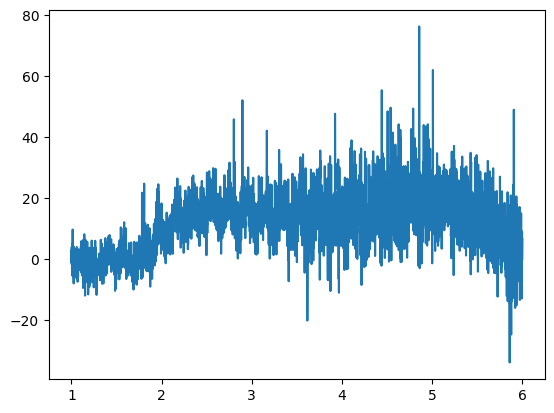

In [118]:
plt.plot(f,gain['7.72']['G']-Gnp)

In [108]:
gain.keys()

dict_keys(['7.6', '7.62', '7.64', '7.66', '7.68', '7.7', '7.72', '7.74', '7.76', '7.78', '7.8'])

[-0.32677978 -1.6295498  -4.13410172 ...  3.86293386 -3.35717614
 -2.77867373]
[-11.78747732 -15.49420032 -12.13053469 ... -11.71040625 -12.82606691
  -3.75702507]
[ 0.44847609 -1.95699342 -5.70809795 ...  1.67059401 -5.83124876
 -0.14798051]
[ 1.70072667 -0.9033349  -3.38858238 ...  9.62713743  0.38413006
  1.86507046]
[-3.91330002 -2.27756705 -0.46571    ...  4.14835362  2.528583
  2.24274676]
[-0.01442067  0.51358145 -3.10859649 ...  6.53620754 -9.11262826
 13.47334168]
[-0.90082288  2.98830091  0.80638106 ... -0.0785107   4.78722362
  6.63260275]
[-0.42671313  1.85855284 -0.6159743  ...  8.1111242   6.98332238
  9.98610305]
[-4.86787228 -0.24043684  1.29811572 ...  9.25608876  8.37598927
 10.50614847]
[ 0.38216473 -0.25915599  0.9308186  ... 11.42617367  4.48550789
 13.71076629]
[-0.36390334  0.85010476 -1.79888841 ... 15.27880707  7.63368346
 19.50402718]


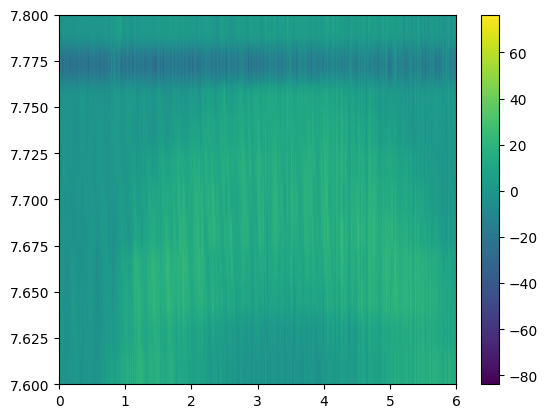

In [115]:
import matplotlib.pyplot as plt
import numpy as np


# Crea una meshgrid per gli assi x e y
X, Y = np.meshgrid(f, y)

data = []
for i in gain.keys():
    data.append(gain[i]['G']-Gnp)
    # print(gain[i]['G']-Gnp)
np.array(data)

plt.imshow(data, cmap='viridis', aspect='auto', extent=[0, 6, 7.6, 7.8])

colorbar = plt.colorbar()

plt.show()
